**OUMZIL ZIAD EDDINE**

*09/10/2023*

*Modèles stochastiques en finance MAP 552*

# <center> Computer Problem Set 1.2
# <center> Simulation of the Brownian motion

In [150]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import binom, norm

## Forward simulation

$1-a)$ By the Brownian motion definition, as $t^n_0 < t^n_1 < ... < t^n_{2^n} $ the increments $(W_{t^n_i}-W_{t^n_{i-1}})_i$ are independent for all $n$, and the distribution of $W_{t^n_i}-W_{t^n_{i-1}}$ is $\mathcal{N}(0, \Delta T )$ as $t^n_{i}- t^n_{i-1} = \Delta T$.

Hence there exist an iid family $(Z_i)_{1\le i\le 2^n}$ of  $\mathcal{N}(0,1)$ such that for all $1 \le i\le 2^n$

$$W_{t^n_i}-W_{t^n_{i-1}} = Z_i \Delta T$$

$$W_{t^n_i}= W_{t^n_{i-1}} + Z_i \Delta T$$

Text(0.5, 1.0, 'Forward Simulation : 1000 paths')

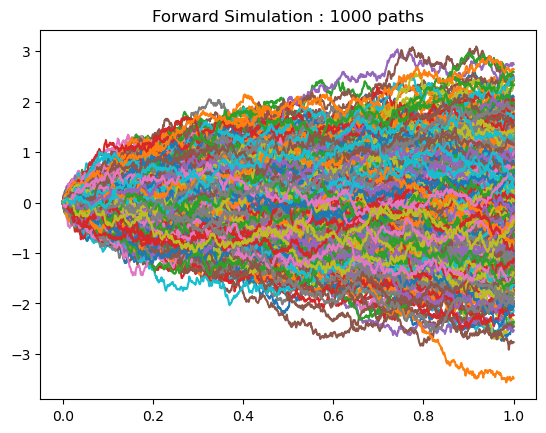

In [151]:
"""Question 1-b)"""


def ForwardSimulation (n, iter):
    N = 2**n
    delta = T/N
    Z = np.random.normal(0, 1, size = (N, iter))
    paths = np.zeros((N+1, iter))
    for i in range(N): 
        paths[i+1, :] = paths[i, :]+Z[i, :]*delta**0.5
    return paths


iter = 1000
T = 1
n = 10
N = 2**n
delta = T/N
paths = ForwardSimulation(n, iter)
time = np.arange(0, N+1)*delta
for i in range(iter):
    plt.plot(time, paths[ : , i])
    
    
plt.title("Forward Simulation : 1000 paths")

The mean value of W_T :  0.048921606591364235
The variance of W_T :  0.9316773153355568
The simple covariance of (W_T, W_{T/2}) : 0.49105785188760703


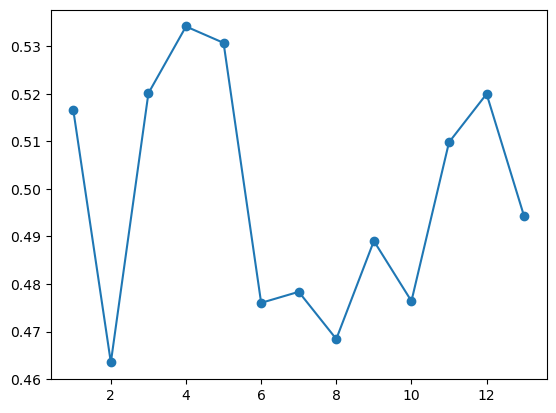

In [152]:
"""Question 1-c)"""


W_T = paths[N, :]
print("The mean value of W_T : ", np.mean(W_T))
print("The variance of W_T : ", np.var(W_T))
W_half = paths[(N//2), :]
print("The simple covariance of (W_T, W_{T/2}) :" , np.cov(W_T, W_half)[0, 1])

iter = 1000
covariance = []
value_n = range(1, 14)
for j in range(1, 14) :
    simul = ForwardSimulation(j , iter)
    N = 2**j
    W_T = simul[N, :]
    W_half = simul[(N//2), :]
    covariance.append(np.cov(W_T, W_half)[0,1])

plt.plot(value_n, covariance, '-o')


## Backward simulation 


$2-a)$ 

We will compute the Laplace transformation, 

\begin{align*}
E(e^{\lambda \cdot W_{\bar{s}}} | W_{s_1}, W_{s_2}) &= E(e^{\lambda \cdot W_{\bar{s}}} | W_{s_1}, W_{s_2}-W_{s_1}) \\
&= e^{\lambda \cdot W_{s_1}}  E(e^{\lambda \cdot (W_{\bar{s}} - W_{s_1})} | W_{s_1}, W_{s_2}-W_{s_1}) \ \ (*) \\
\end{align*}

$W_{s_1}$ is independent of $W_{\bar{s}} - W_{s_1}$ and of $W_{s_2}-W_{s_1}$, 

Hence 


$$E(e^{\lambda \cdot (W_{\bar{s}} - W_{s_1})} | W_{s_1}, W_{s_2}-W_{s_1}) =  E(e^{\lambda \cdot (W_{\bar{s}} - W_{s_1})} | W_{s_2}-W_{s_1})
$$


Let $X_t = W_{t+s_1} - W_{s_1}$ for $t\ge 0$ , $(X_t)$ is a brownian motion.


Therefore the distrubution $W_{\bar{s}} - W_{s_1} | W_{s_2}-W_{s_1} = X_{\bar{s}-s_1} |  X_{s_2-s_1}$ is a normal $\mathcal{N}(\mu, \sigma^2)$, where $\mu = \frac{\bar{s}-s_1}{s_2-s_1} (W_{s_2}-W_{s_1})= \frac{1}{2} (W_{s_2}-W_{s_1})$ and $\sigma^2 = (\bar{s}-s_1) (1-\frac{\bar{s}-s_1}{s_2-s_1})(W_{s_2}-W_{s_1}) = \frac{s_2-s_1}{4}(W_{s_2}-W_{s_1})$


$$E(e^{\lambda \cdot (W_{\bar{s}} - W_{s_1})} | W_{s_2}-W_{s_1}) = exp\left(\frac{1}{2}(W_{s_2}-W_{s_1}) \cdot \lambda + \frac{1}{2} \frac{s_2-s_1}{4}  \cdot \lambda^2 \right ) $$
 
Then $(*)$ becomes : 

\begin{align*}
E(e^{\lambda \cdot W_{\bar{s}}} | W_{s_1}, W_{s_2}) 
&= exp\left(\lambda \cdot W_{s_1} \right) \cdot exp\left(\frac{1}{2}(W_{s_2}-W_{s_1}) \cdot \lambda + \frac{1}{2} \frac{s_2-s_1}{4}  \cdot \lambda^2 \right) \\ 

&=  exp\left(\frac{W_{s_2}+W_{s_1}}{2} \cdot \lambda + \frac{1}{2} \frac{s_2-s_1}{4}  \cdot \lambda^2 \right)\\

\end{align*}

We conclude that the distribution of $W_{\bar{s}} | W_{s_1}, W_{s_2}$ is a normal distrubution with mean : $\bar{x} = \frac{W_{s_2}+W_{s_1}}{2}$ and variance : $\frac{s_2-s_1}{4} $


$2-b)$

Text(0.5, 1.0, 'BackwardSimulation : 1000 paths')

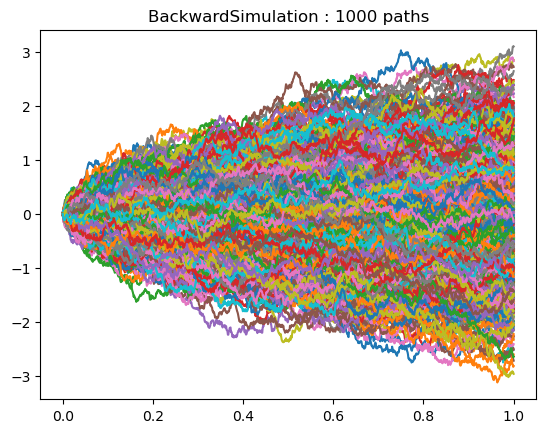

In [156]:
"""Question 2-c)"""

n = 10
N = 2**n
T = 1
iter = 1000
delta = T/N
time = np.arange(0, N+1)*delta


def BackwardSimulation(n, iter) : 
    N = 2**n
    simul = np.zeros((N+1, iter))
    simul[N , :] = np.random.normal(0, T, iter)
    current  = [0, N]
    next = []
    for i in range(n):
        for j in range(0, len(current)-1):
            left = current[j]
            right = current[j+1]
            mid = left + (right-left)//2
            simul[mid, :] = np.random.normal((simul[left, :] + simul[right, :])/2 , np.sqrt((right-left)/4 * (T/N)))
            next.append(left)
            next.append(mid)
        next.append(N)
        current = next
        next = []
    return simul
    

simul = BackwardSimulation(n, iter)
for k in range(iter):
    plt.plot(time, simul[:, k])
plt.title("BackwardSimulation : 1000 paths")

In [1]:
"""Question 2-d)"""

W_T = simul[N, :]
print("The mean value of W_T : ", np.mean(W_T))
print("The variance of W_T : ", np.var(W_T))
W_half = simul[N//2, :]
print("The simple covariance of (W_T, W_{T/2}) :" , np.cov(W_T, W_half)[0, 1])

covariance = []
value_n = range(1, 14)
for j in range(1, 14) :
    simul = BackwardSimulation(j , iter)
    N = 2**j
    W_T = simul[N, :]
    W_half = simul[(N//2), :]
    covariance.append(np.cov(W_T, W_half)[0,1])
print(covariance)
theoric_cov = np.zeros(len(value_n)) + 0.5

plt.plot(value_n, covariance, '-o', label='simulation covariance')
plt.plot(value_n, theoric_cov, label='theoric covariance', color='orange')
plt.legend()


NameError: name 'simul' is not defined